In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv("/content/Dataset.csv")

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [8]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [9]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

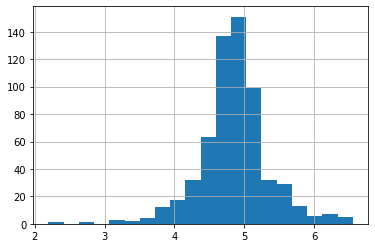

In [10]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [11]:
train=train.drop('Loan_ID',axis=1)

In [12]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [13]:
X['Gender'] = np.where(X['Gender'] == 'Male', 1,0)

In [14]:
X['Married'] = np.where(X['Married'] == 'Yes', 1,0)

In [15]:
X['Education'] = np.where(X['Education'] == 'Graduate', 1,0)

In [16]:
X['Self_Employed']=np.where(X['Self_Employed']=='Yes',1,0)

In [17]:
X['Property_Area']=np.where(X['Property_Area']=='Urban',1,np.where(X['Property_Area']=='Rural',2,3))

In [18]:
y=np.where(y=='Y',1,0)

In [19]:
a=X.copy()

In [20]:
a=a.drop('Dependents',1)

In [21]:
a.astype('int32').dtypes

Gender               int32
Married              int32
Education            int32
Self_Employed        int32
ApplicantIncome      int32
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        int32
LoanAmount_log       int32
dtype: object

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(a,y, test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_log = LogisticRegression()
model_log.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred_cv = model_log.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8373983739837398

In [27]:
pred_cv=model_log.predict(x_train)
accuracy_score(y_train,pred_cv)

0.8044806517311609

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [30]:
pred=knn.predict(x_cv)

In [31]:
accuracy_score(y_cv,pred)

0.5772357723577236

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RFC = RandomForestClassifier(n_estimators=121,max_depth=200,max_leaf_nodes=50,random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
pred=RFC.predict(x_cv)
accuracy_score(y_cv,pred)

0.8292682926829268

In [36]:
pred_cv=RFC.predict(x_train)
accuracy_score(y_train,pred_cv)

0.8981670061099797

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DT = DecisionTreeClassifier(min_samples_leaf=10)
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
pred=DT.predict(x_cv)

In [40]:
accuracy_score(y_cv,pred)

0.7967479674796748

In [41]:
pred_cv=DT.predict(x_train)
accuracy_score(y_train,pred_cv)

0.8126272912423625

In [42]:
from sklearn.naive_bayes import GaussianNB  
NB = GaussianNB()  
NB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
pred = NB.predict(x_cv)
accuracy_score(y_cv,pred)

0.8455284552845529

In [44]:
pred_cv=NB.predict(x_train)
accuracy_score(y_train,pred_cv)

0.8024439918533605